In [83]:
import pandas as pd
import numpy as np
import math
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
gold = pd.read_csv('gold_prices.csv')
silver = pd.read_csv('silver_prices.csv')
gold_and_silver = pd.read_csv('gold_prices_new.csv')

Polynomial degree :  10
RMSE : 1481.1316397569854
Score :  0.8232467292486185


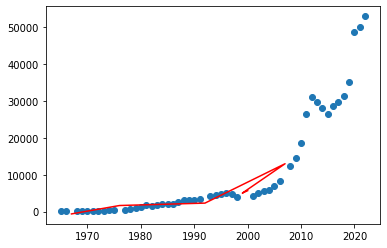

In [84]:
#Q1
df = gold
x = np.array(df['Year'].values).reshape(-1,1)
y = np.array(df['Price'].values)

x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                 test_size=0.1,random_state=0)
rmses = []
degrees = np.arange(1, 11)
min_rmse, min_deg = 1e10, 0

for deg in degrees:
    poly_features = PolynomialFeatures(degree=deg)
    X = poly_features.fit_transform(x_train)
    model = LinearRegression()
    model.fit(X, y_train)

    X_new = poly_features.transform(x_test)
    y_pred = model.predict(X_new)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmses.append(rmse)
    
    if min_rmse > rmse:
        min_rmse = rmse
        min_deg = deg

        
print('Polynomial degree : ',min_deg)
plt.scatter(x_train, y_train, label='Original Data')
plt.plot(x_test, y_pred, 'r-', label='Polynomial Regression')
print('RMSE :',rmse)

r_sq = model.score(X_new, y_test)
print('Score : ',r_sq)

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0

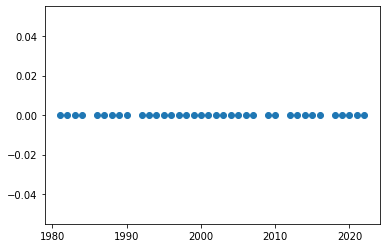

In [96]:
# Q2

x = np.array(df['Year'].values).reshape(-1,1)
for i in range(len(df)):
    if df['Price'][i] > 26000:
        df['Price'][i]=1
    else:
        df['Price'][i]=0
y = np.array(df['Price'].values)

x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                 test_size=0.1,random_state=0)

plt.scatter(x_train,y_train)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

model = LogisticRegression(solver='liblinear')
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print(classification_report(y_test, y_pred))

In [89]:
#Q3

df = gold_and_silver
x = df[['Year', 'Gold_Price']]
y = df['Silver_Price']

x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                 test_size=0.1,random_state=0)
poly = PolynomialFeatures(degree=4)
X = poly.fit_transform(x_train)
 
poly.fit(X, y)
lin = LinearRegression()
lin.fit(X, y_train)

X_test = poly.fit_transform(x_test)
y_pred = lin.predict(X_test)
print(y_pred)
print(y_test)

r_sq = lin.score(X_test, y_test)
print('Score : ',r_sq)

[46758.23182287 38195.01130991 20341.46211882  3943.18829244
  5744.34941696]
30    56900
36    37825
27    23625
4      3955
10     6646
Name: Silver_Price, dtype: int64
Score :  0.9415556943302837
